In [20]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import folium
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import hvplot.pandas 
import geoviews as gv
import geoviews.tile_sources as gvts

# File to Load (Remember to Change These)
all_perth_house = Path("resources/all_perth_310121.csv")

# Read all perth houses sales prices and store into Pandas DataFrames
house_prices_perth = pd.read_csv(all_perth_house)




In [119]:
house_prices_perth.head()

ADDRESS      SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0    1 Acorn Place  South Lake  565000         4          2     2.0   
1      1 Addis Way       Wandi  365000         3          2     2.0   
2  1 Ainsley Court     Camillo  287000         3          1     1.0   
3  1 Albert Street    Bellevue  255000         2          1     2.0   
4     1 Aman Place   Lockridge  325000         4          1     2.0   

   LAND AREA  FLOOR AREA  BUILD YEAR  CBD DIST  ... NEAREST STN DIST  \
0        600         160      2003.0     18300  ...             1800   
1        351         139      2013.0     26900  ...             4900   
2        719          86      1979.0     22600  ...             1900   
3        651          59      1953.0     17900  ...             3600   
4        466         131      1998.0     11200  ...             2000   

   DATE SOLD POSTCODE   LATITUDE   LONGITUDE                   NEAREST SCH  \
0    09-2018     6164 -32.115900  115.842450   LAKELAND SENIOR HIGH SCHOOL   
1    02-2019     6167 -32.193470  115.859554                ATWELL COLLEGE   
2    06-2015     6111 -32.120578  115.993579  KELMSCOTT SENIOR HIGH SCHOOL   
3    07-2018     6056 -31.900547  116.038009  SWAN VIEW SENIOR HIGH SCHOOL   
4    11-2016     6054 -31.885790  115.947780                 KIARA COLLEGE   

  NEAREST SCH DIST  NEAREST SCH RANK  KM FROM CBD  KM FROM STN  
0         0.828339               NaN         18.3          1.8  
1         5.524324             129.0         26.9          4.9  
2         1.649178             113.0         22.6          1.9  
3         1.571401               NaN         17.9          3.6  
4         1.514922               NaN         11.2          2.0  

[5 rows x 21 columns]

In [22]:
house_prices_perth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [120]:
# Specify the columns for display
columns_to_display = ["ADDRESS", "LATITUDE", "LONGITUDE", "SUBURB", "BEDROOMS",
                      "BATHROOMS", "GARAGE", "LAND AREA", "FLOOR AREA", "BUILD YEAR", "KM FROM CBD",
                      "DATE SOLD", "POSTCODE", "NEAREST SCH", "NEAREST SCH RANK",
                      "NEAREST SCH DIST"]

# Remove underscores from column names
house_prices_perth.columns = [col.replace("_", " ") for col in house_prices_perth.columns]

# Convert 'CBD DIST' from meters to kilometers
house_prices_perth['KM FROM CBD'] = house_prices_perth['CBD DIST'] / 1000
house_prices_perth['KM FROM STN'] = house_prices_perth['NEAREST STN DIST'] / 1000

# Fill NaN values in 'GARAGE' column with 0
house_prices_perth['GARAGE'].fillna(0, inplace=True)

house_prices_perth['DATE SOLD'] = house_prices_perth['DATE SOLD'].str.replace('\r', '')

# Display the DataFrame with selected columns
selected_columns_df = house_prices_perth[columns_to_display]

house_prices_perth_cleaned = house_prices_perth.dropna(subset=['NEAREST SCH RANK', 'BUILD YEAR'])
house_prices_perth_cleaned.head()

ADDRESS        SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
1            1 Addis Way         Wandi  365000         3          2     2.0   
2        1 Ainsley Court       Camillo  287000         3          1     1.0   
9       1 Arundel Street     Bayswater  685000         3          2     8.0   
11        1 Ashcott Gate        Butler  367500         3          2     2.0   
13  1 Ashendon Boulevard  Hammond Park  535000         4          2     4.0   

    LAND AREA  FLOOR AREA  BUILD YEAR  CBD DIST  ... NEAREST STN DIST  \
1         351         139      2013.0     26900  ...             4900   
2         719          86      1979.0     22600  ...             1900   
9         552         126      1999.0      5900  ...              508   
11        398         158      2003.0     36300  ...             2100   
13        704         247      2002.0     23100  ...             3900   

    DATE SOLD POSTCODE   LATITUDE   LONGITUDE                   NEAREST SCH  \
1     02-2019     6167 -32.193470  115.859554                ATWELL COLLEGE   
2     06-2015     6111 -32.120578  115.993579  KELMSCOTT SENIOR HIGH SCHOOL   
9     10-2019     6053 -31.917880  115.907050     CHISHOLM CATHOLIC COLLEGE   
11    11-2018     6036 -31.654280  115.702200                BUTLER COLLEGE   
13    07-2019     6164 -32.159590  115.849480                ATWELL COLLEGE   

   NEAREST SCH DIST  NEAREST SCH RANK  KM FROM CBD  KM FROM STN  
1          5.524324             129.0         26.9        4.900  
2          1.649178             113.0         22.6        1.900  
9          0.936243              29.0          5.9        0.508  
11         0.680843              39.0         36.3        2.100  
13         2.220643             129.0         23.1        3.900  

[5 rows x 21 columns]

In [24]:
house_prices_perth_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20692 entries, 1 to 33651
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           20692 non-null  object 
 1   SUBURB            20692 non-null  object 
 2   PRICE             20692 non-null  int64  
 3   BEDROOMS          20692 non-null  int64  
 4   BATHROOMS         20692 non-null  int64  
 5   GARAGE            20692 non-null  float64
 6   LAND AREA         20692 non-null  int64  
 7   FLOOR AREA        20692 non-null  int64  
 8   BUILD YEAR        20692 non-null  float64
 9   CBD DIST          20692 non-null  int64  
 10  NEAREST STN       20692 non-null  object 
 11  NEAREST STN DIST  20692 non-null  int64  
 12  DATE SOLD         20692 non-null  object 
 13  POSTCODE          20692 non-null  int64  
 14  LATITUDE          20692 non-null  float64
 15  LONGITUDE         20692 non-null  float64
 16  NEAREST SCH       20692 non-null  object

In [77]:
print (house_prices_perth_cleaned)

                    ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
1               1 Addis Way            Wandi   365000         3          2   
2           1 Ainsley Court          Camillo   287000         3          1   
9          1 Arundel Street        Bayswater   685000         3          2   
11           1 Ashcott Gate           Butler   367500         3          2   
13     1 Ashendon Boulevard     Hammond Park   535000         4          2   
...                     ...              ...      ...       ...        ...   
33646       9B North Street       Swanbourne  1700000         4          3   
33648   9B Teocote Crescent      Aubin Grove   423000         3          2   
33649       9B Viveash Road      Middle Swan   467000         4          2   
33650      9b Wesley Street  South Fremantle   955000         3          2   
33651        9C Gold Street  South Fremantle  1040000         4          3   

       GARAGE  LAND AREA  FLOOR AREA  BUILD YEAR  CBD DIST  ...

In [26]:
# Define the bins for 5km increments
bins = range(0, int(house_prices_perth_cleaned['KM FROM CBD'].max()) + 6, 5)

# Group the data by bins and calculate the count of houses in each bin
houses_sold_by_distance = house_prices_perth_cleaned.groupby(pd.cut(house_prices_perth_cleaned['KM FROM CBD'], bins)).size()

# Print the results
houses_sold_by_distance

KM FROM CBD
(0, 5]      1462
(5, 10]     3568
(10, 15]    4529
(15, 20]    2918
(20, 25]    3428
(25, 30]    2050
(30, 35]     906
(35, 40]     871
(40, 45]     424
(45, 50]      84
(50, 55]     321
(55, 60]     131
dtype: int64

In [28]:
# Group by bedrooms, suburb, and other relevant columns, then calculate the average sale price
grouped_data = house_prices_perth_cleaned.groupby(['BEDROOMS', 'SUBURB', 'KM FROM CBD'])['PRICE'].mean()

# Reset the index to make the groupby results a DataFrame
grouped_data = grouped_data.reset_index()

# Find the areas with the highest average sale prices for each bedroom count
lowest_avg_prices = grouped_data.groupby('BEDROOMS').apply(lambda x: x[x['PRICE'] == x['PRICE'].min()])

# Apply currency formatting to the "PRICE" column
lowest_avg_prices_styled = lowest_avg_prices.copy()
lowest_avg_prices_styled['PRICE'] = lowest_avg_prices_styled['PRICE'].apply(lambda x: '${:,.2f}'.format(x))

# Display the result with hidden index numbers and formatted prices
styled_result = lowest_avg_prices_styled.style.hide_index()
styled_result


C:\Users\Aaron\AppData\Local\Temp\ipykernel_15728\4242390722.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled_result = lowest_avg_prices_styled.style.hide_index()


In [132]:
%%capture --no-display
# Configura el mapa interactivo con hvplot
map_plot = house_prices_perth_cleaned.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo=True,
    tiles="EsriImagery",
    size="PRICE",
    frame_width=1400,
    frame_height=900,
    scale=0.01,
    color="SUBURB",
    alpha=0.7,
)
# Display the map
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (SUBURB,PRICE)

In [116]:
import hvplot.pandas  # Import hvplot extension
import geoviews as gv
import geoviews.tile_sources as gvts

# Define the GeoViews element
points = gv.Points(house_prices_perth_cleaned, kdims=['LONGITUDE', 'LATITUDE'])

# Create the map using GeoViews and Tile Source
map_plot = gvts.CartoLight() * points

# Display the map using hvplot
map_plot.opts(width=800, height=600, tools=['hover'])





:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND AREA,FLOOR AREA,BUILD YEAR,CBD DIST,NEAREST STN,NEAREST STN DIST,DATE SOLD,POSTCODE,NEAREST SCH,NEAREST SCH DIST,NEAREST SCH RANK,KM FROM CBD,KM FROM STN,LAND AREA BIN)

In [30]:
house_prices_perth_cleaned.head()

ADDRESS        SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
1            1 Addis Way         Wandi  365000         3          2     2.0   
2        1 Ainsley Court       Camillo  287000         3          1     1.0   
9       1 Arundel Street     Bayswater  685000         3          2     8.0   
11        1 Ashcott Gate        Butler  367500         3          2     2.0   
13  1 Ashendon Boulevard  Hammond Park  535000         4          2     4.0   

    LAND AREA  FLOOR AREA  BUILD YEAR  CBD DIST  ... NEAREST STN DIST  \
1         351         139      2013.0     26900  ...             4900   
2         719          86      1979.0     22600  ...             1900   
9         552         126      1999.0      5900  ...              508   
11        398         158      2003.0     36300  ...             2100   
13        704         247      2002.0     23100  ...             3900   

    DATE SOLD POSTCODE   LATITUDE   LONGITUDE                   NEAREST SCH  \
1     02-2019     6167 -32.193470  115.859554                ATWELL COLLEGE   
2     06-2015     6111 -32.120578  115.993579  KELMSCOTT SENIOR HIGH SCHOOL   
9     10-2019     6053 -31.917880  115.907050     CHISHOLM CATHOLIC COLLEGE   
11    11-2018     6036 -31.654280  115.702200                BUTLER COLLEGE   
13    07-2019     6164 -32.159590  115.849480                ATWELL COLLEGE   

   NEAREST SCH DIST  NEAREST SCH RANK  KM FROM CBD  KM FROM STN  
1          5.524324             129.0         26.9        4.900  
2          1.649178             113.0         22.6        1.900  
9          0.936243              29.0          5.9        0.508  
11         0.680843              39.0         36.3        2.100  
13         2.220643             129.0         23.1        3.900  

[5 rows x 21 columns]

In [31]:
# Convert DATE_SOLD to datetime format using .loc indexer
house_prices_perth_cleaned['DATE SOLD'] = pd.to_datetime(house_prices_perth_cleaned['DATE SOLD'], format='%m-%Y')


# Group by suburb and year, then calculate the total number of houses sold and average sale price
grouped_data = house_prices_perth_cleaned.groupby(['SUBURB', house_prices_perth_cleaned['DATE SOLD'].dt.year]) \
                                  .agg({'PRICE': 'mean', 'SUBURB': 'count'}) \
                                  .rename(columns={'SUBURB': 'HOUSES SOLD', 'PRICE': 'AVG SALE PRICE'})

# Reset the index to make the groupby results a DataFrame
grouped_data = grouped_data.reset_index()

# Display the result
grouped_data


C:\Users\Aaron\AppData\Local\Temp\ipykernel_15728\1625402600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices_perth_cleaned['DATE SOLD'] = pd.to_datetime(house_prices_perth_cleaned['DATE SOLD'], format='%m-%Y')


SUBURB  DATE SOLD  AVG SALE PRICE  HOUSES SOLD
0     Alexander Heights       2016   506333.333333            9
1     Alexander Heights       2017   425500.000000           10
2     Alexander Heights       2018   462125.000000            4
3     Alexander Heights       2019   367312.500000            8
4     Alexander Heights       2020   458555.555556            9
...                 ...        ...             ...          ...
1740           Wooroloo       2017   451666.666667            3
1741           Wooroloo       2018   995000.000000            1
1742             Yokine       2018   589550.000000           10
1743             Yokine       2019   586767.857143           14
1744             Yokine       2020   703404.761905           21

[1745 rows x 4 columns]

C:\Users\Aaron\AppData\Local\Temp\ipykernel_15728\1571242126.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


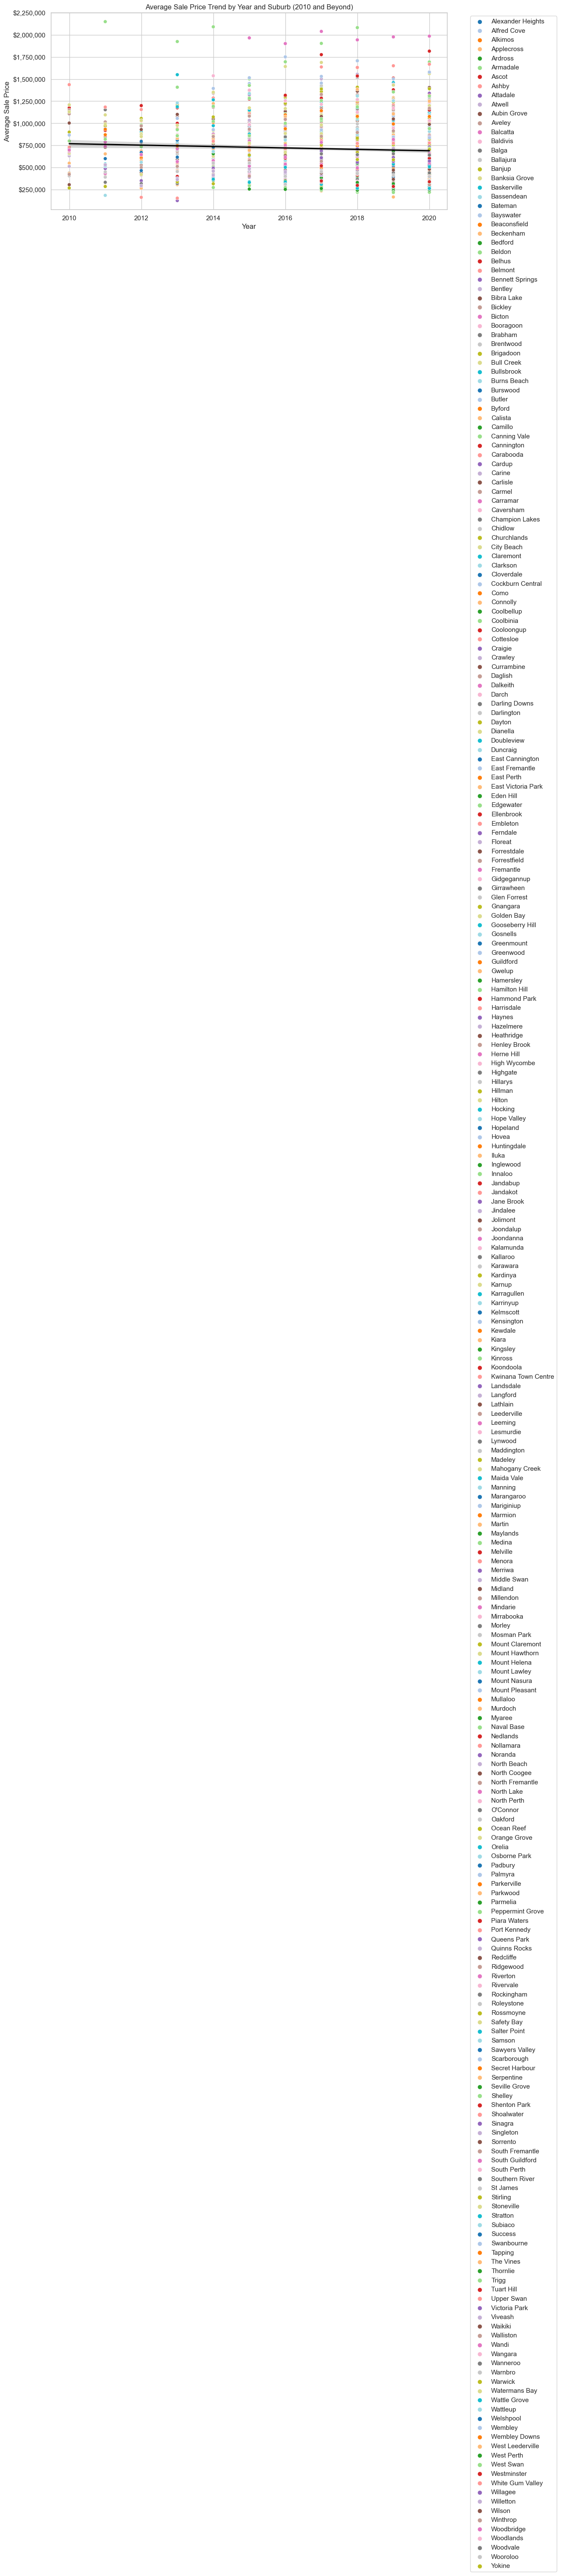

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module

# Convert DATE_SOLD to datetime format
house_prices_perth_cleaned['DATE SOLD'] = pd.to_datetime(house_prices_perth_cleaned['DATE SOLD'], format='%m-%Y')

# Filter data for years 2010 and beyond
house_prices_perth_cleaned = house_prices_perth_cleaned[house_prices_perth_cleaned['DATE SOLD'] >= '2010-01-01']

# Group by suburb and year, then calculate the average sale price
grouped_data = house_prices_perth_cleaned.groupby(['SUBURB', house_prices_perth_cleaned['DATE SOLD'].dt.year])['PRICE'].mean().reset_index()

# Create a scatter plot with trendline
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.scatterplot(data=grouped_data, x='DATE SOLD', y='PRICE', hue='SUBURB', palette='tab20')

# Add a trendline to the plot
sns.regplot(data=grouped_data, x='DATE SOLD', y='PRICE', scatter=False, color='black')

plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price Trend by Year and Suburb (2010 and Beyond)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis labels as dollars with thousands separators
ax = plt.gca()
formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Save the plot with a filename based on the plot title
plot_title = 'Average Sale Price Trend by Year and Suburb (2010 and Beyond)'
plt.savefig(f'{plot_title}.jpg', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

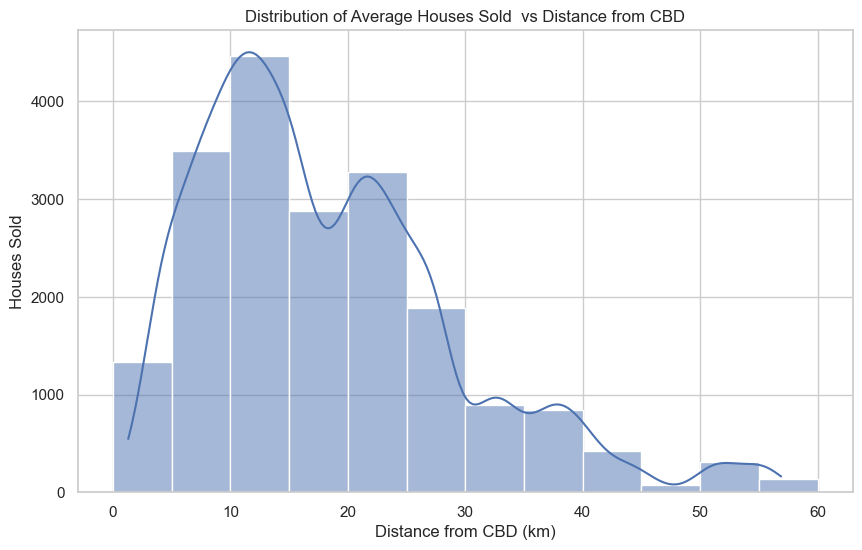

In [85]:
# Create a histogram with seaborn using previously defined bins
plt.figure(figsize=(10, 6))
sns.histplot(data=house_prices_perth_cleaned, x='KM FROM CBD', bins=bins, kde=True)

# Add labels and title
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Houses Sold')
plt.title('Distribution of Average Houses Sold  vs Distance from CBD')

# Save the plot with a filename based on the plot title
plot_title = 'Distribution_of_Average_Houses_Sold_vs_Distance_from_CBD'
plt.savefig(f'{plot_title}.jpg', dpi=300, bbox_inches='tight')


# Display the plot
plt.show()


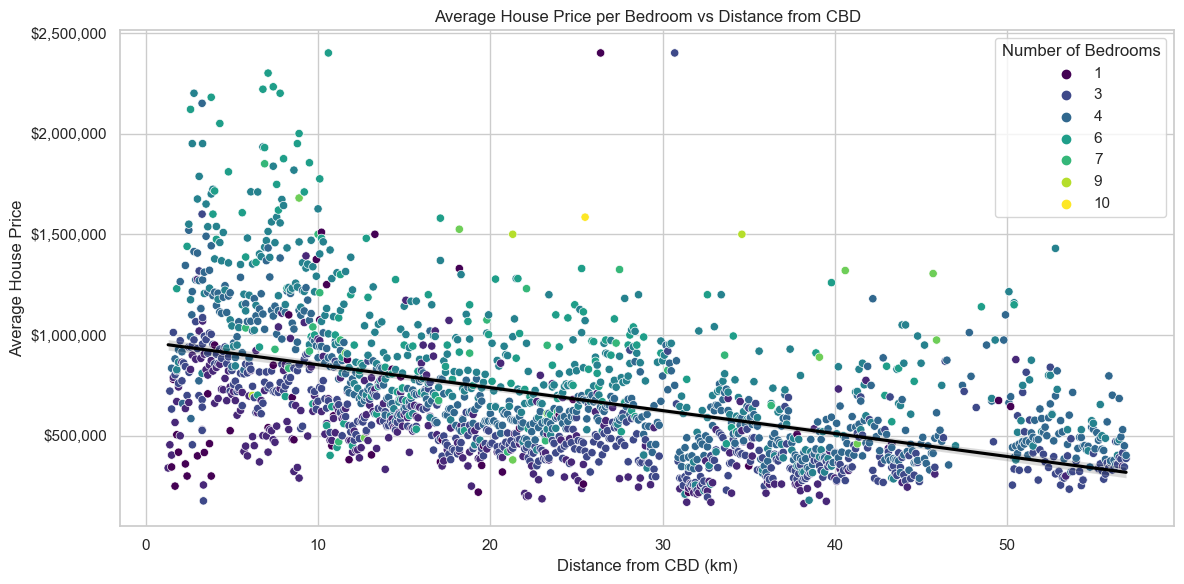

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data and perform necessary preprocessing
# ...

# Group data by distance from CBD and number of bedrooms, and calculate average house price
grouped_data = house_prices_perth_cleaned.groupby(['KM FROM CBD', 'BEDROOMS'])['PRICE'].mean().reset_index()

# Create a scatter plot with seaborn
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.scatterplot(data=grouped_data, x='KM FROM CBD', y='PRICE', hue='BEDROOMS', palette='viridis')

# Add trend lines to the plot
sns.regplot(data=grouped_data, x='KM FROM CBD', y='PRICE', scatter=False, color='black')

plt.xlabel('Distance from CBD (km)')
plt.ylabel('Average House Price')
plt.title('Average House Price per Bedroom vs Distance from CBD')
plt.legend(title='Number of Bedrooms')

# Format y-axis ticks as dollar amounts
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Save the plot with a filename based on the plot title
plot_title = 'Average House Price per Bedroom vs Distance from CBD'
plt.savefig(f'{plot_title}.jpg', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


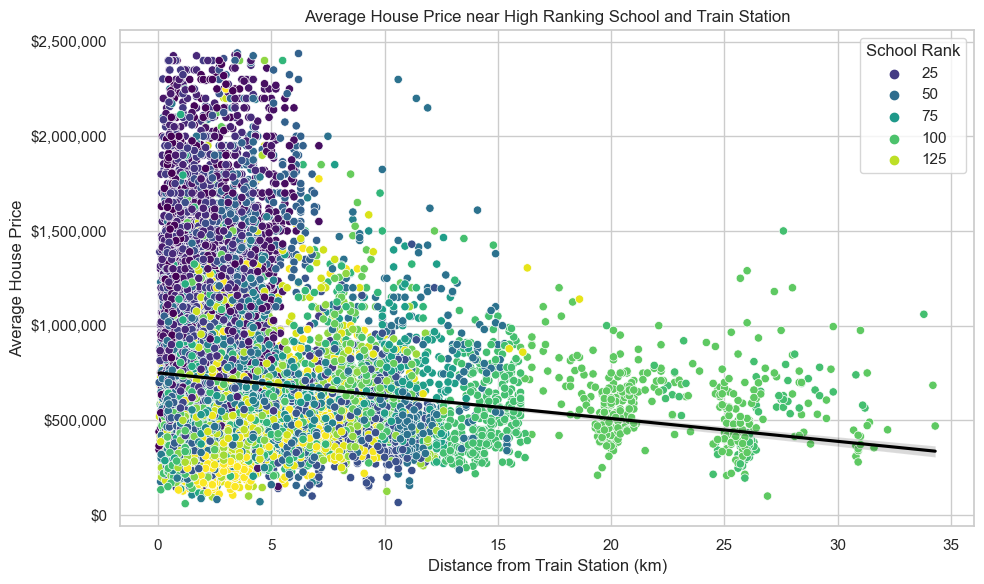

In [88]:
# Filter the data to include only rows with high ranking schools and train stations
filtered_data = house_prices_perth_cleaned[house_prices_perth_cleaned['NEAREST SCH RANK'] > 0]

# Create a scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

sns.scatterplot(data=filtered_data, x='KM FROM STN', y='PRICE', hue='NEAREST SCH RANK', palette='viridis')

# Add a trend line to the plot
sns.regplot(data=filtered_data, x='KM FROM STN', y='PRICE', scatter=False, color='black')

plt.xlabel('Distance from Train Station (km)')
plt.ylabel('Average House Price')
plt.title('Average House Price near High Ranking School and Train Station')
plt.legend(title='School Rank')

# Format y-axis ticks as dollar amounts
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Save the plot with a filename based on the plot title
plot_title = 'Average House Price near High Ranking School and Train Station'
plt.savefig(f'{plot_title}.jpg', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


C:\Users\Aaron\AppData\Local\Temp\ipykernel_15728\1022855323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices_perth_cleaned['DATE SOLD'] = pd.to_datetime(house_prices_perth_cleaned['DATE SOLD'], format='%m-%Y')


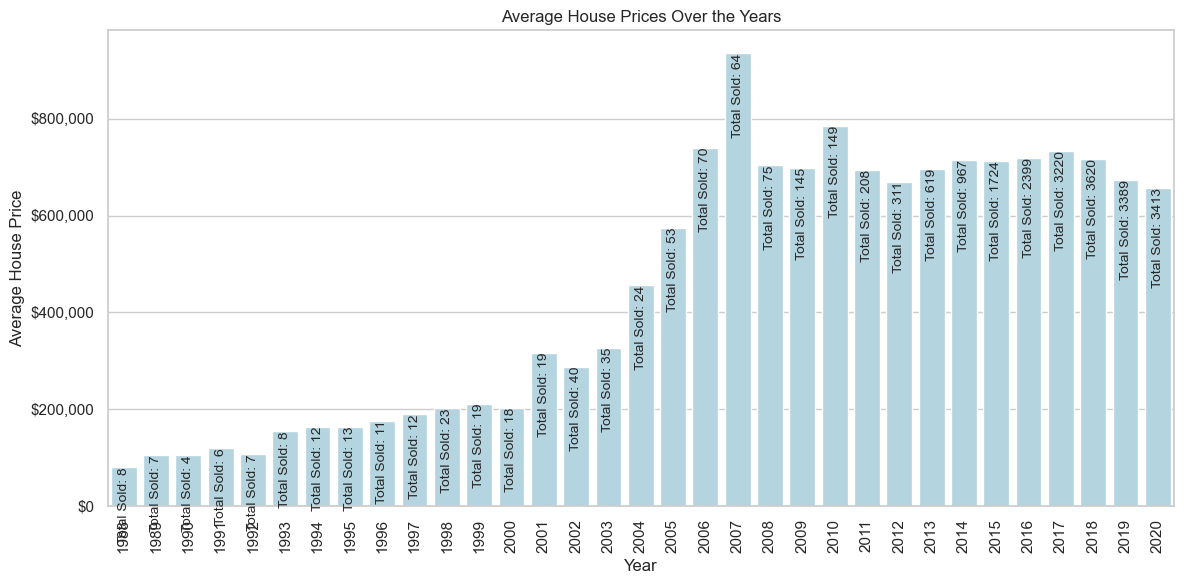

In [122]:
# Convert DATE_SOLD to datetime format
house_prices_perth_cleaned['DATE SOLD'] = pd.to_datetime(house_prices_perth_cleaned['DATE SOLD'], format='%m-%Y')

# Group data by year and calculate average house price
grouped_data = house_prices_perth_cleaned.groupby(house_prices_perth_cleaned['DATE SOLD'].dt.year)['PRICE'].mean().reset_index()

# Calculate the total number of houses sold per year
total_houses_sold = house_prices_perth_cleaned.groupby(house_prices_perth_cleaned['DATE SOLD'].dt.year)['PRICE'].count().reset_index()
total_houses_sold.columns = ['DATE SOLD', 'Total Houses Sold']

# Merge the total houses sold data with the average price data
grouped_data = pd.merge(grouped_data, total_houses_sold, on='DATE SOLD')

# Create a bar plot with seaborn
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

sns.barplot(data=grouped_data, x='DATE SOLD', y='PRICE', color='lightblue')

plt.xlabel('Year')
plt.ylabel('Average House Price')
plt.title('Average House Prices Over the Years')

# Rotate x-axis labels to vertical
plt.xticks(rotation='vertical')

# Format y-axis labels as dollars with thousands separators
ax = plt.gca()
formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Show the total houses sold on each bar vertically as integers
for index, row in grouped_data.iterrows():
    plt.text(index, row['PRICE'], f"Total Sold: {int(row['Total Houses Sold'])}", ha='center', va='top', fontsize=10, rotation=90)

    # Save the plot with a filename based on the plot title
plot_title = 'Average House Prices Over the Years'
plt.savefig(f'{plot_title}.jpg', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


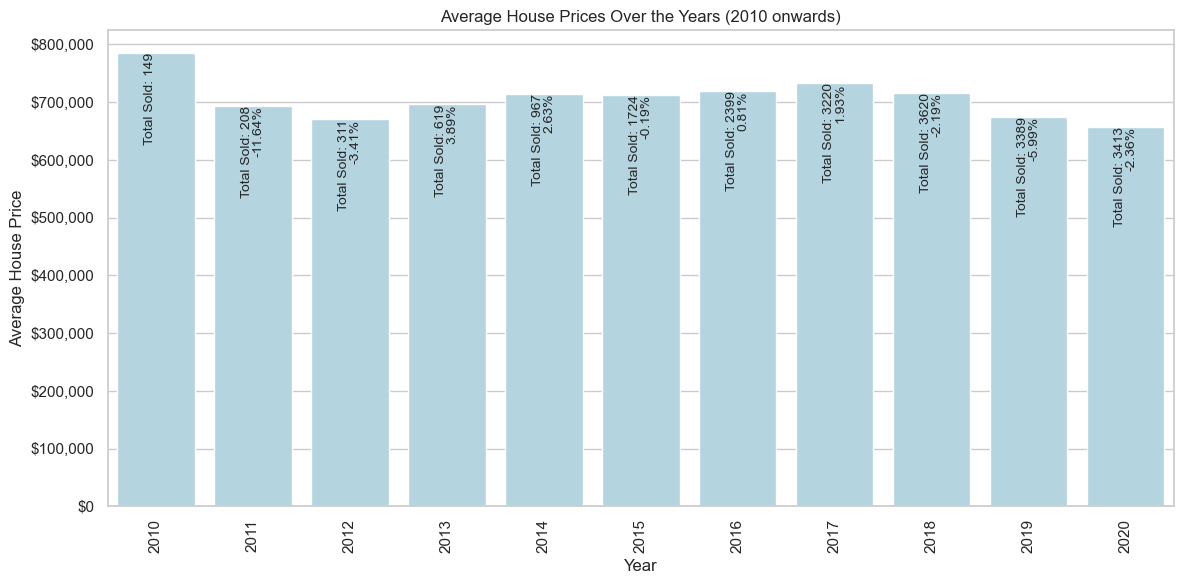

In [128]:
# Convert DATE_SOLD to datetime format
house_prices_perth_cleaned['DATE SOLD'] = pd.to_datetime(house_prices_perth_cleaned['DATE SOLD'], format='%m-%Y')

# Filter data to include only years from 2010 onwards
house_prices_perth_cleaned = house_prices_perth_cleaned[house_prices_perth_cleaned['DATE SOLD'].dt.year >= 2010]

# Group data by year and calculate average house price
grouped_data = house_prices_perth_cleaned.groupby(house_prices_perth_cleaned['DATE SOLD'].dt.year)['PRICE'].mean().reset_index()

# Calculate the total number of houses sold per year
total_houses_sold = house_prices_perth_cleaned.groupby(house_prices_perth_cleaned['DATE SOLD'].dt.year)['PRICE'].count().reset_index()
total_houses_sold.columns = ['DATE SOLD', 'Total Houses Sold']

# Merge the total houses sold data with the average price data
grouped_data = pd.merge(grouped_data, total_houses_sold, on='DATE SOLD')

# Calculate the percentage change in average price compared to the previous year
grouped_data['Percentage Change'] = grouped_data['PRICE'].pct_change() * 100

# Create a bar plot with seaborn
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

sns.barplot(data=grouped_data, x='DATE SOLD', y='PRICE', color='lightblue')

plt.xlabel('Year')
plt.ylabel('Average House Price')
plt.title('Average House Prices Over the Years (2010 onwards)')

# Rotate x-axis labels to vertical
plt.xticks(rotation='vertical')

# Format y-axis labels as dollars with thousands separators
ax = plt.gca()
formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Show the total houses sold on each bar vertically as integers
for index, row in grouped_data.iterrows():
    plt.text(index, row['PRICE'], f"Total Sold: {int(row['Total Houses Sold'])}", ha='right', va='top', fontsize=10, rotation=90)

# Show the percentage change as text on the bars
for index, row in grouped_data.iterrows():
    if not pd.isna(row['Percentage Change']):
        plt.text(index, row['PRICE'], f"{row['Percentage Change']:.2f}%", ha='left', va='top', fontsize=10, rotation=90)

# Save the plot with a filename based on the plot title
plot_title = 'Average House Prices Over the Years (2010 onwards)'
plt.savefig(f'{plot_title}.jpg', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


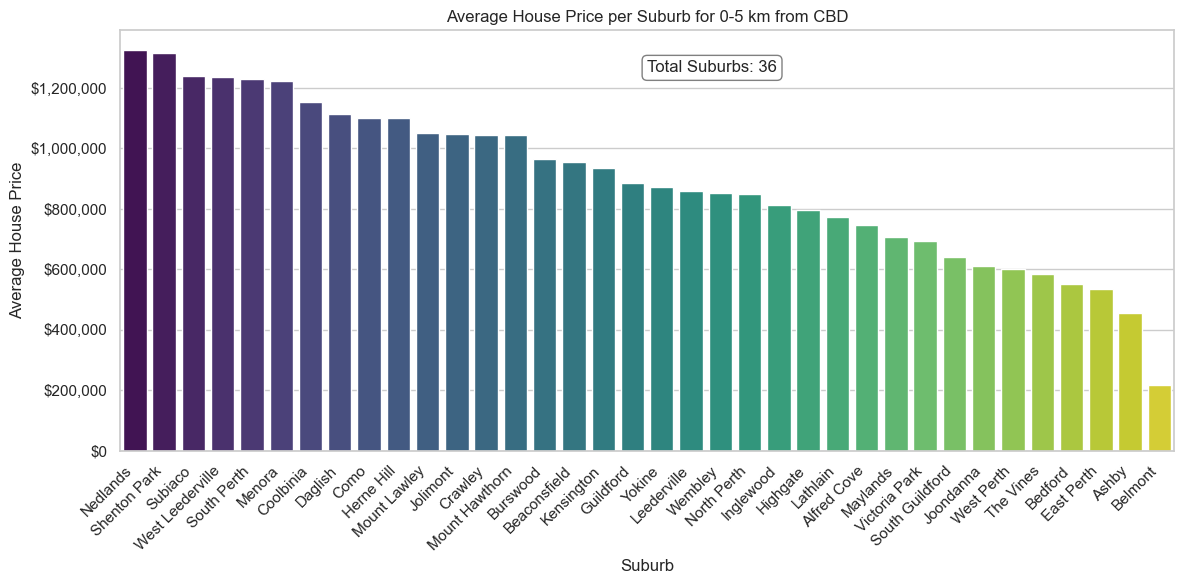

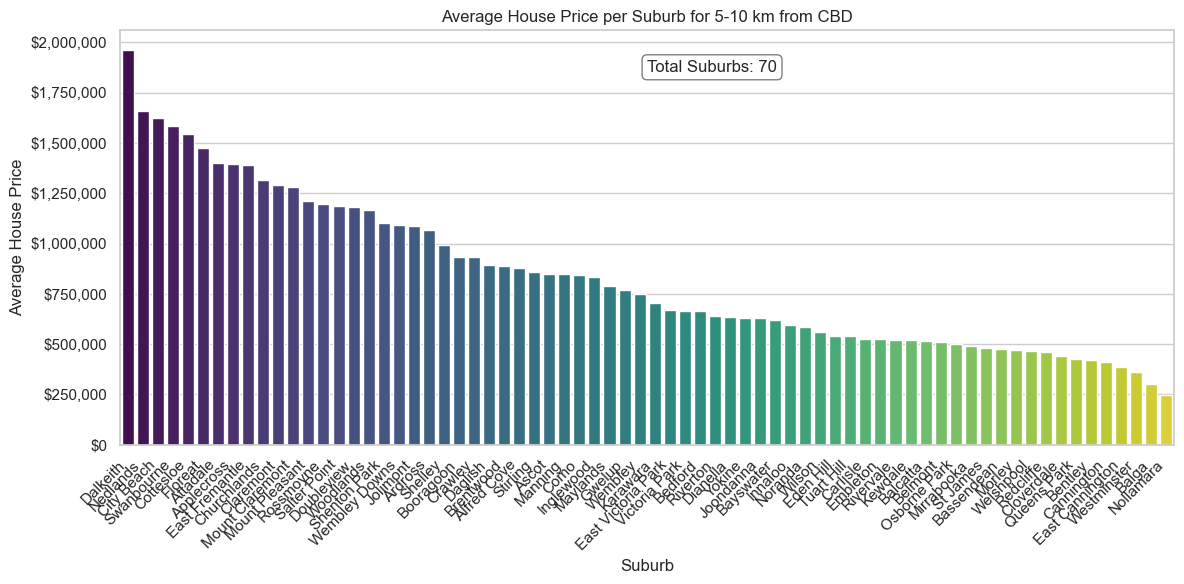

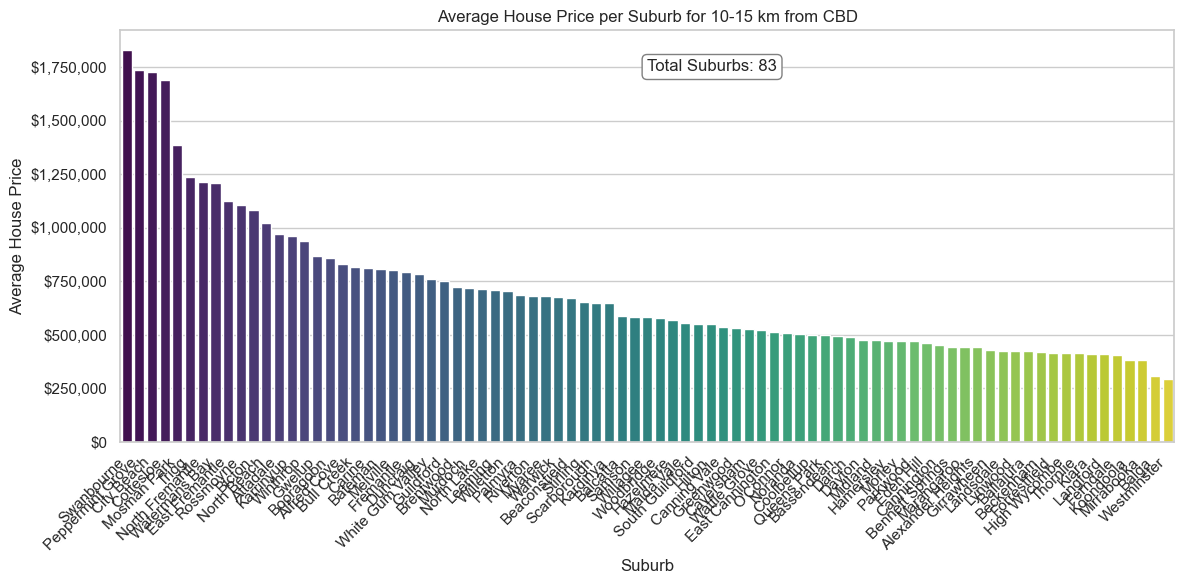

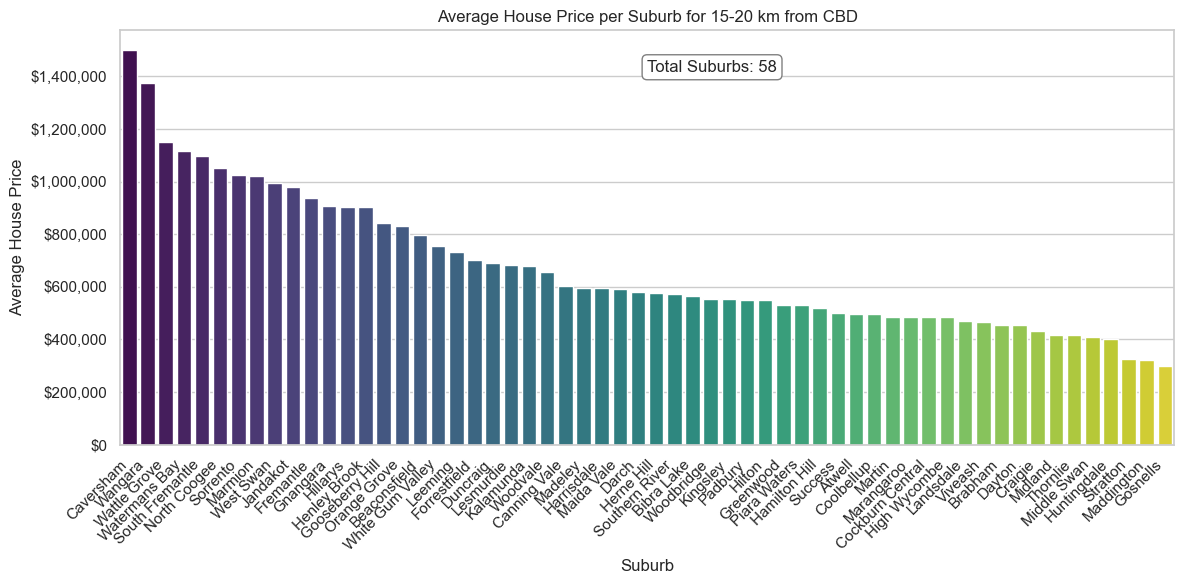

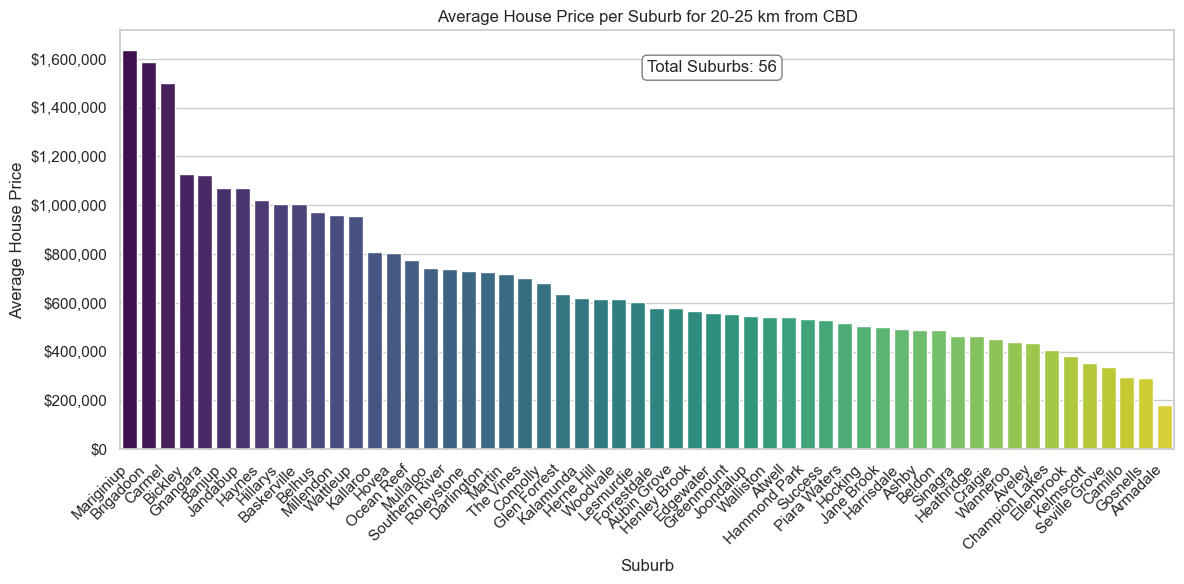

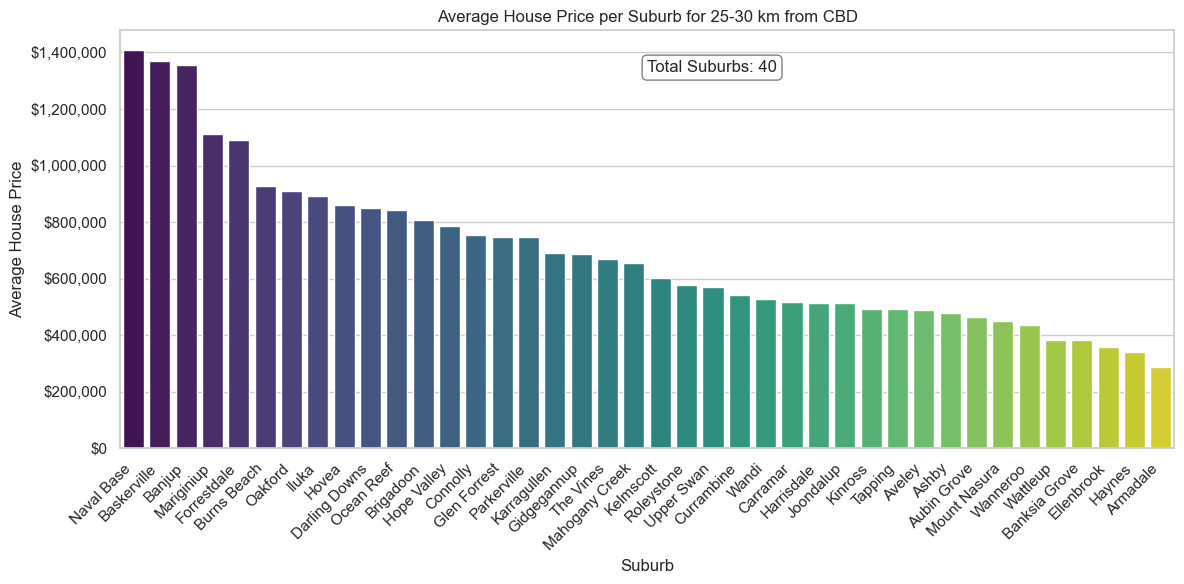

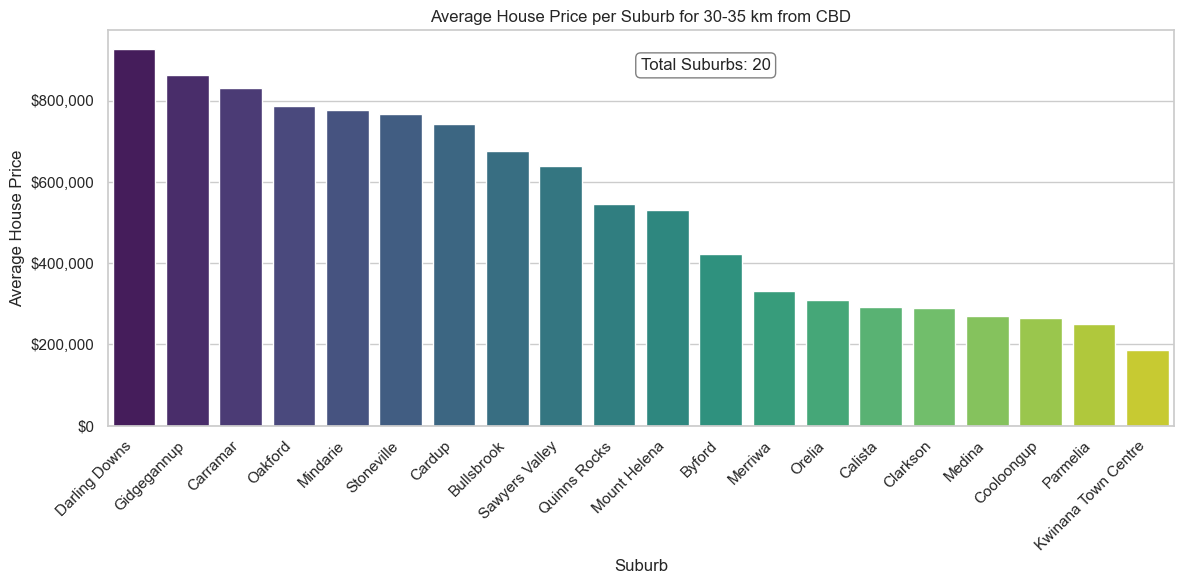

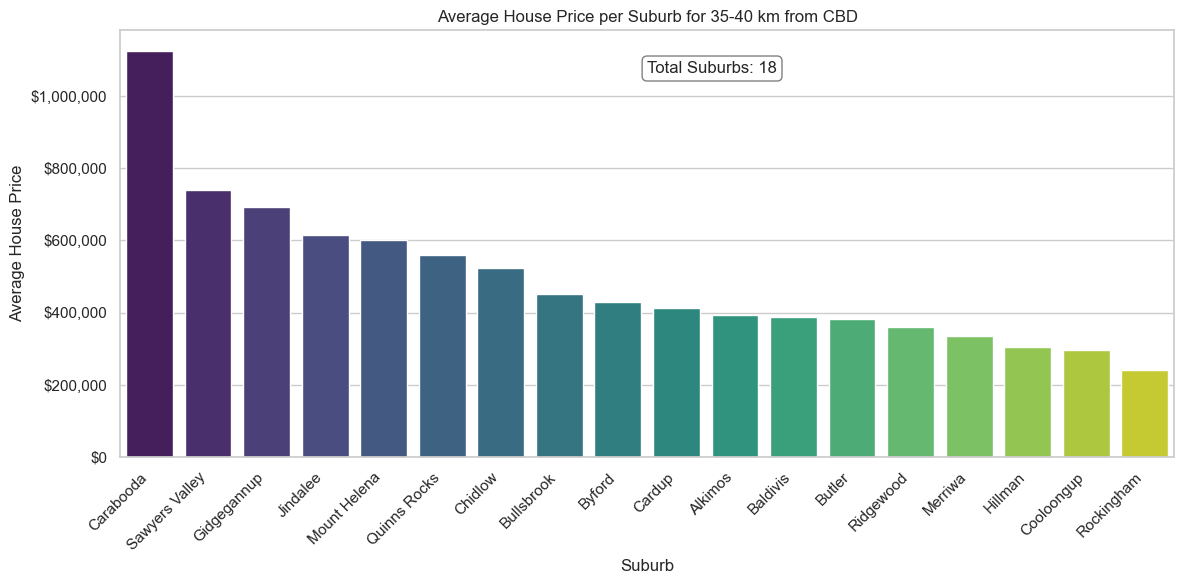

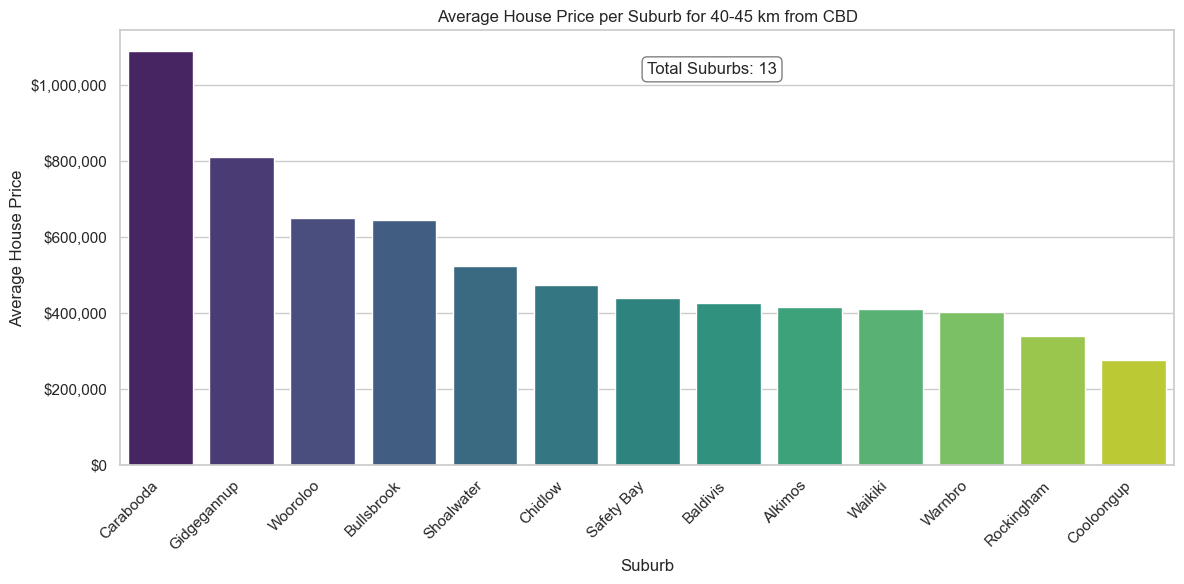

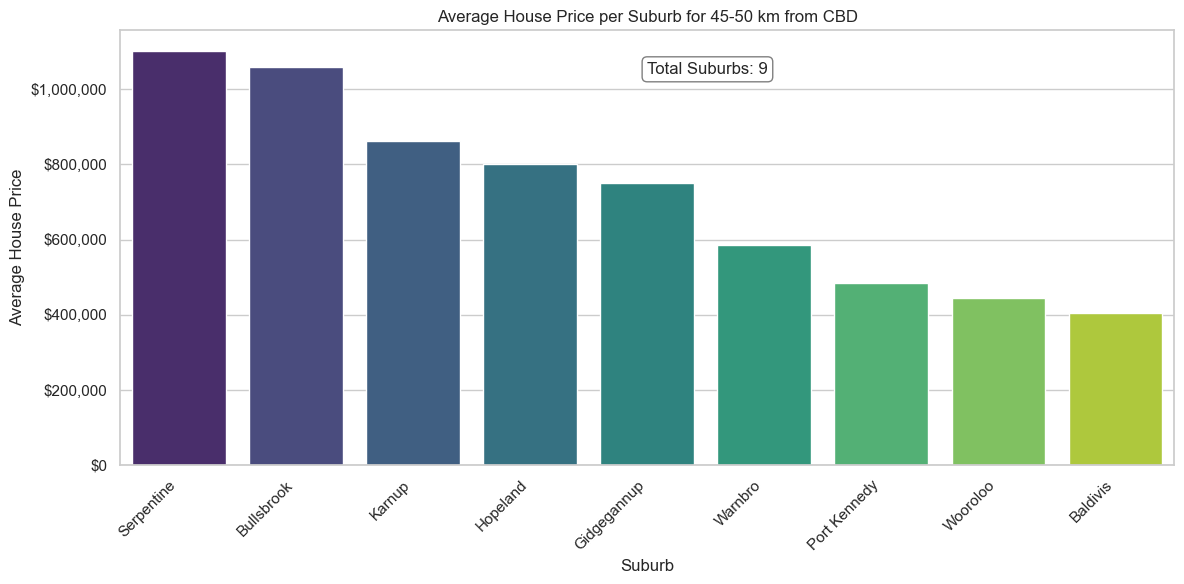

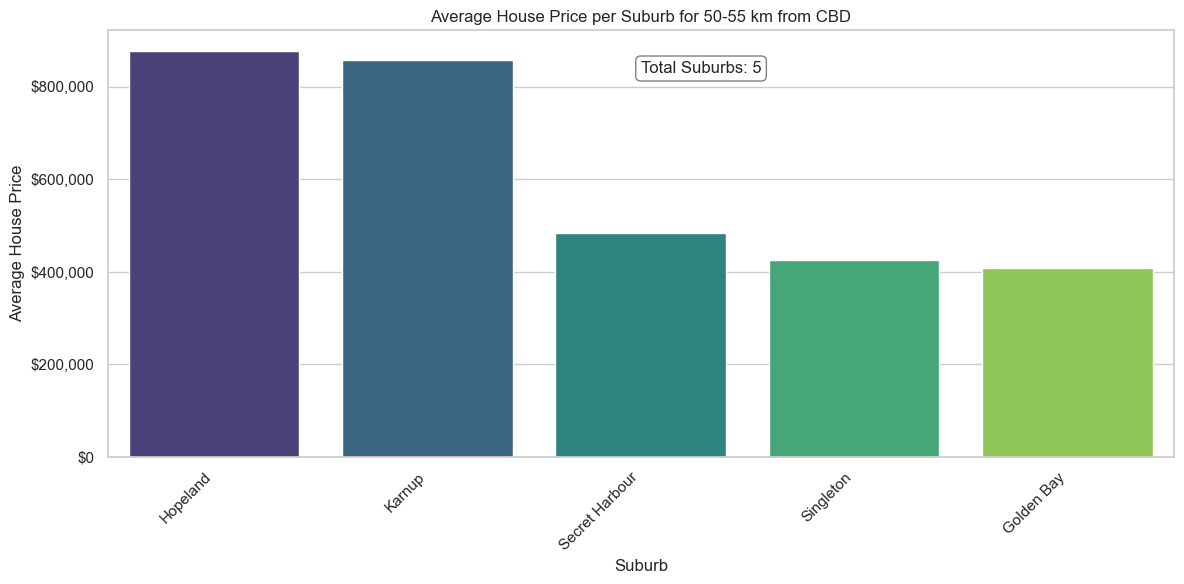

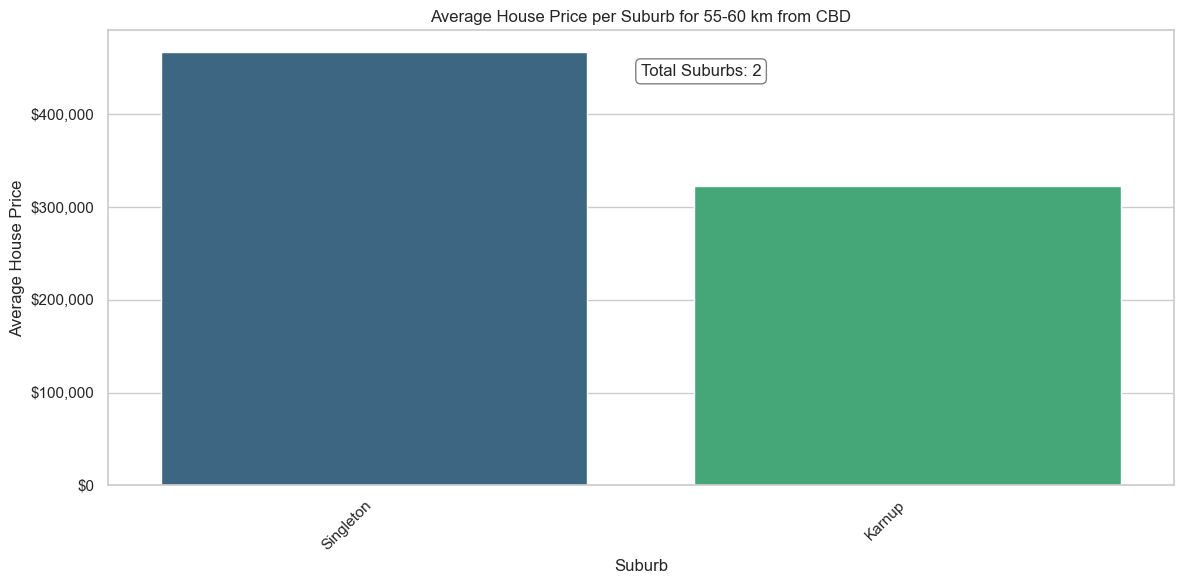

In [91]:
# Convert DATE_SOLD to datetime format
house_prices_perth_cleaned['DATE SOLD'] = pd.to_datetime(house_prices_perth_cleaned['DATE SOLD'], format='%m-%Y')

# Define the bins for 5km increments
bins = range(0, int(house_prices_perth_cleaned['KM FROM CBD'].max()) + 6, 5)

# Iterate through bins and create separate graphs for each bin
for i in range(len(bins) - 1):
    lower_bound = bins[i]
    upper_bound = bins[i + 1]
    
    # Filter data for the current bin
    filtered_data = house_prices_perth_cleaned[(house_prices_perth_cleaned['KM FROM CBD'] >= lower_bound) &
                                               (house_prices_perth_cleaned['KM FROM CBD'] < upper_bound)]
    
    # Group data by suburb and calculate average house price
    grouped_data = filtered_data.groupby('SUBURB')['PRICE'].mean().reset_index()
    grouped_data = grouped_data.sort_values(by='PRICE', ascending=False)
    
    # Create a bar plot with seaborn
    plt.figure(figsize=(12, 6))
    sns.set(style='whitegrid')

    sns.barplot(data=grouped_data, x='SUBURB', y='PRICE', palette='viridis')

    plt.xlabel('Suburb')
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price per Suburb for {lower_bound}-{upper_bound} km from CBD')

    # Rotate x-axis labels to avoid overlapping
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis ticks as dollar amounts with commas
    formatter = ticker.StrMethodFormatter('${x:,.0f}')
    plt.gca().yaxis.set_major_formatter(formatter)
    
    # Calculate the total number of suburbs and add it to the plot
    total_suburbs = len(grouped_data)
    plt.text(0.50, 0.9, f'Total Suburbs: {total_suburbs}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

    # Extract the title from the current Axes
    plot_title = plt.gca().get_title()
    
    # Remove spaces in the title for the filename
    file_name = plot_title.replace(' ', '_')
    
    # Save the plot with plt.title as the filename
    plt.savefig(f'{file_name}.jpg', dpi=300, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()



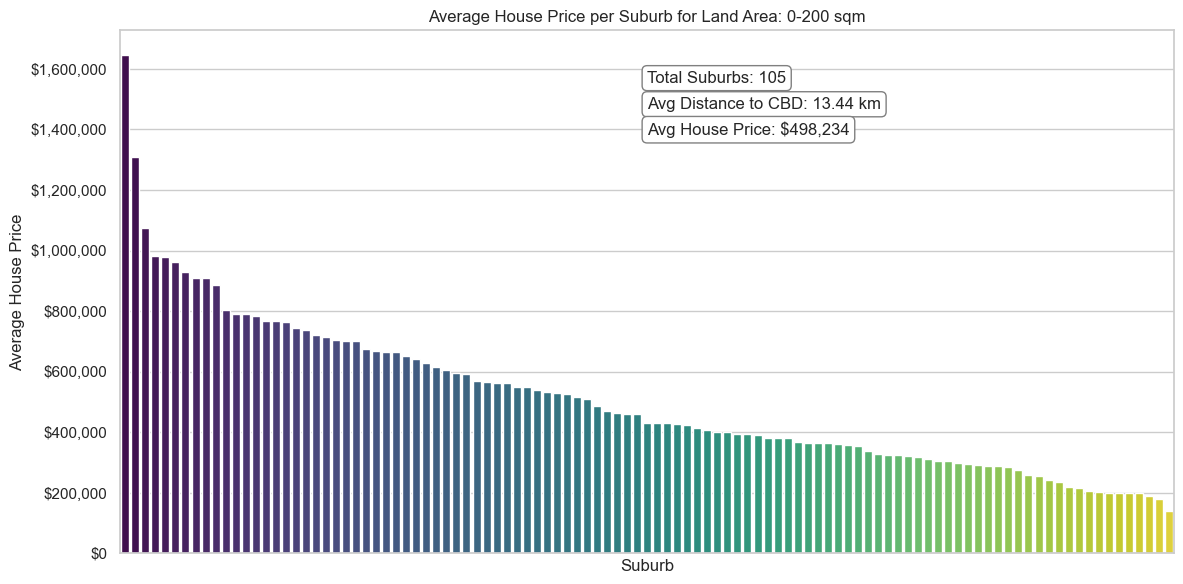

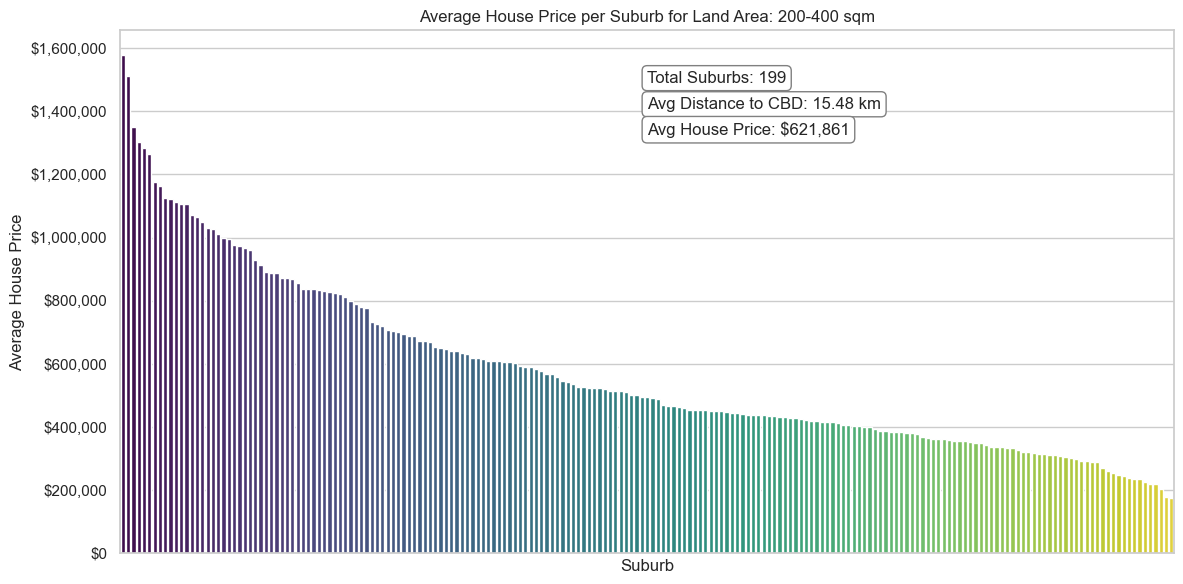

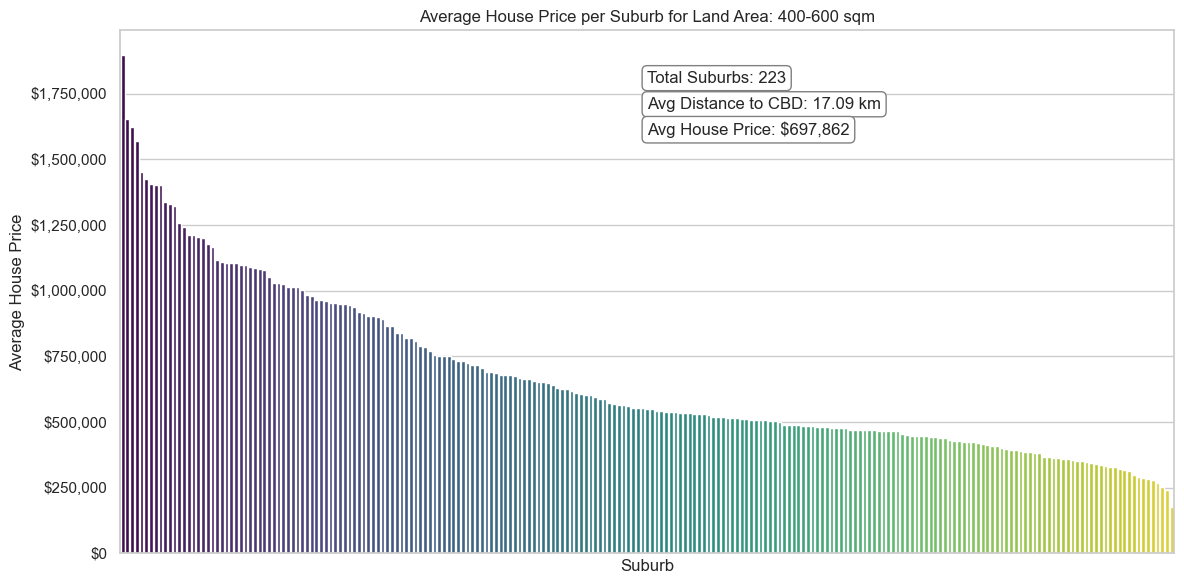

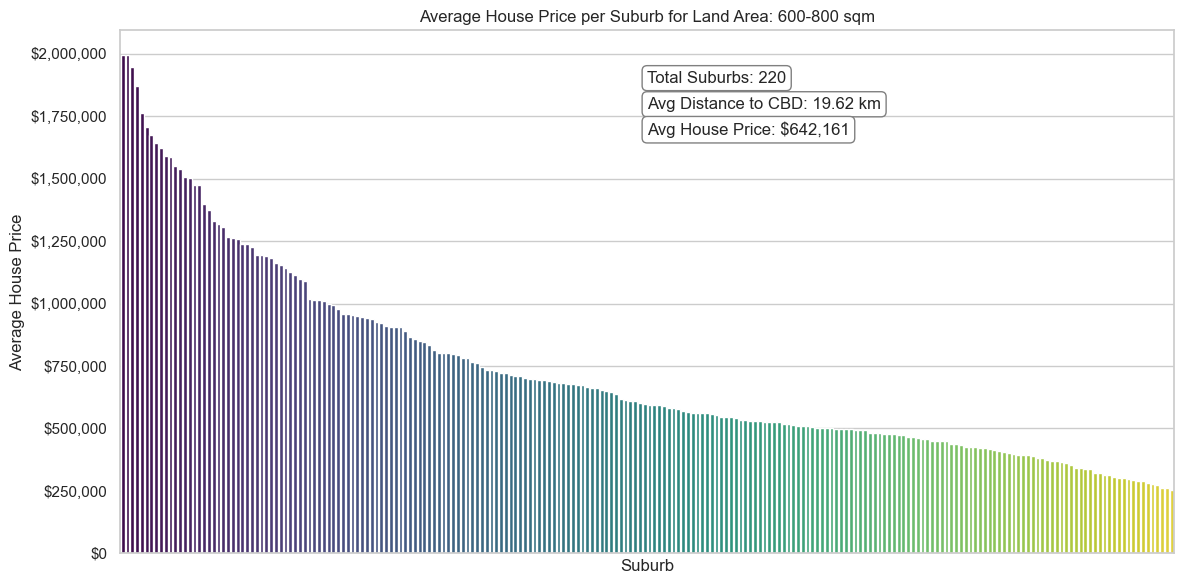

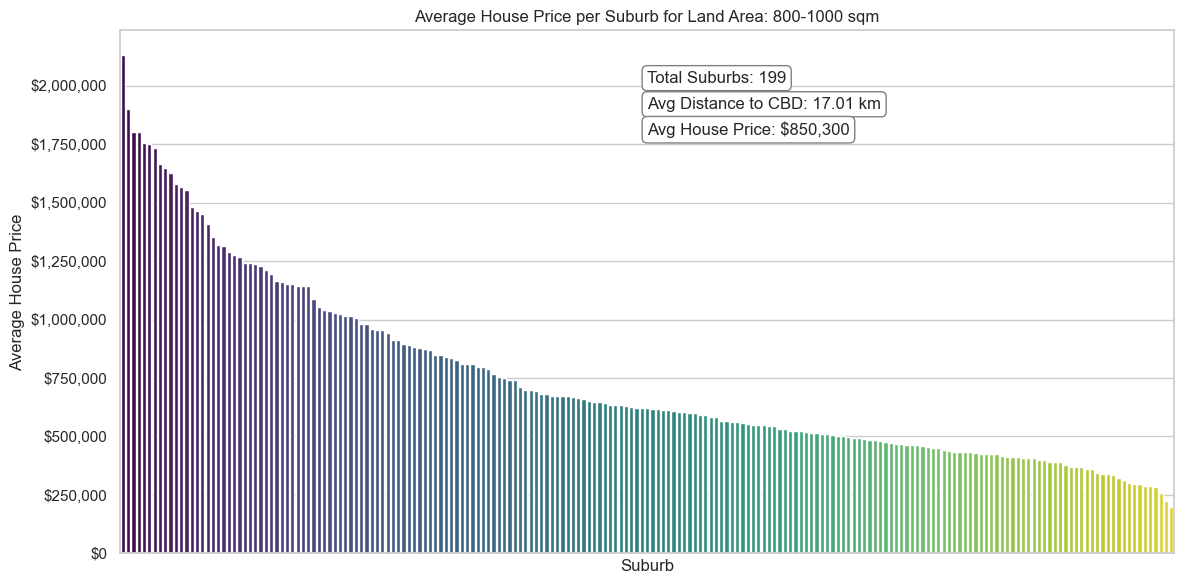

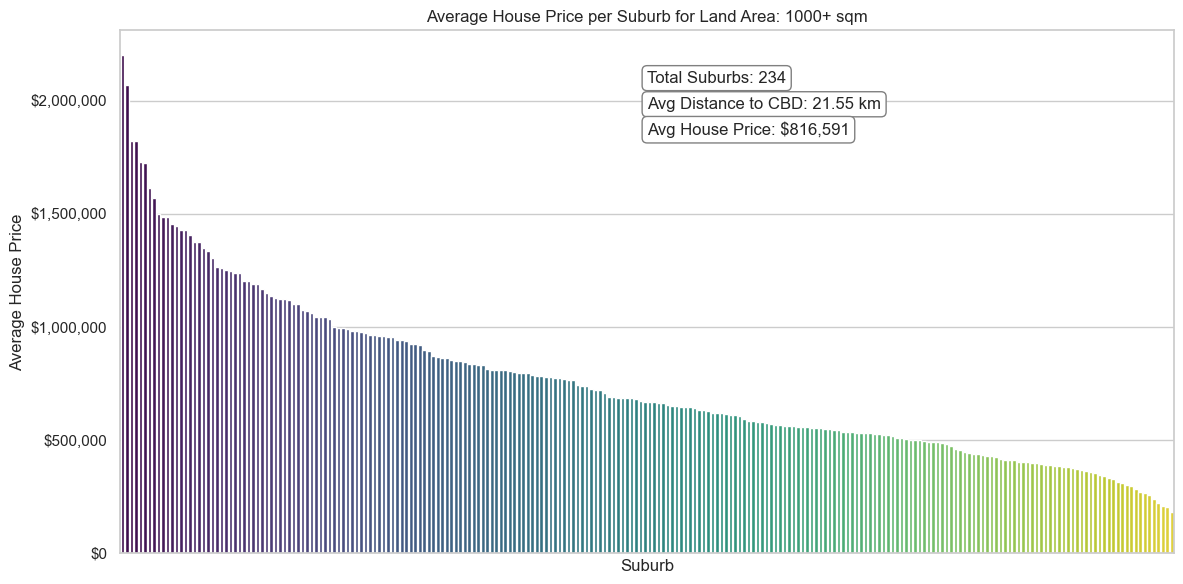

In [137]:
# Define the land area bins
land_area_bins = [0, 200, 400, 600, 800, 1000, float('inf')]
land_area_labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000+']

# Create a new column 'LAND AREA BIN' based on the land area bins
house_prices_perth_cleaned['LAND AREA BIN'] = pd.cut(house_prices_perth_cleaned['LAND AREA'], bins=land_area_bins, labels=land_area_labels)


# Iterate through land area bins and create separate graphs for each bin
for bin_label in land_area_labels:
    # Filter data for the current bin
    filtered_data = house_prices_perth_cleaned[house_prices_perth_cleaned['LAND AREA BIN'] == bin_label]
    
    # Calculate the average distance to CBD for the current bin
    average_distance_to_cbd = filtered_data['KM FROM CBD'].mean()
    
    # Calculate the average house price for the current bin
    average_house_price = filtered_data['PRICE'].mean()
    
    # Group data by suburb and calculate average house price
    grouped_data = filtered_data.groupby('SUBURB')['PRICE'].mean().reset_index()
    grouped_data = grouped_data.sort_values(by='PRICE', ascending=False)
    
    # Create a bar plot with seaborn
    plt.figure(figsize=(12, 6))
    sns.set(style='whitegrid')

    sns.barplot(data=grouped_data, x='SUBURB', y='PRICE', palette='viridis')

    plt.xlabel('Suburb')
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price per Suburb for Land Area: {bin_label} sqm')

    # Rotate x-axis labels to avoid overlapping
    plt.xticks([])
    
    # Format y-axis ticks as dollar amounts with commas
    formatter = ticker.StrMethodFormatter('${x:,.0f}')
    plt.gca().yaxis.set_major_formatter(formatter)
    
     # Calculate and add the total number of suburbs to the plot
    total_suburbs = len(grouped_data)
    plt.text(0.50, 0.9, f'Total Suburbs: {total_suburbs}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
    
    # Add the average distance to CBD to the plot
    plt.text(0.50, 0.85, f'Avg Distance to CBD: {average_distance_to_cbd:.2f} km', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
    
    # Add the average house price to the plot
    plt.text(0.50, 0.80, f'Avg House Price: ${average_house_price:,.0f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
    
   # Define the filename based on the land area bin
    file_name = f'land_area_{bin_label}.jpg'
    
    # Save the plot with the specified filename
    plt.tight_layout()
    plt.savefig(file_name, dpi=300, bbox_inches='tight') 
    
    plt.tight_layout()
    plt.show()


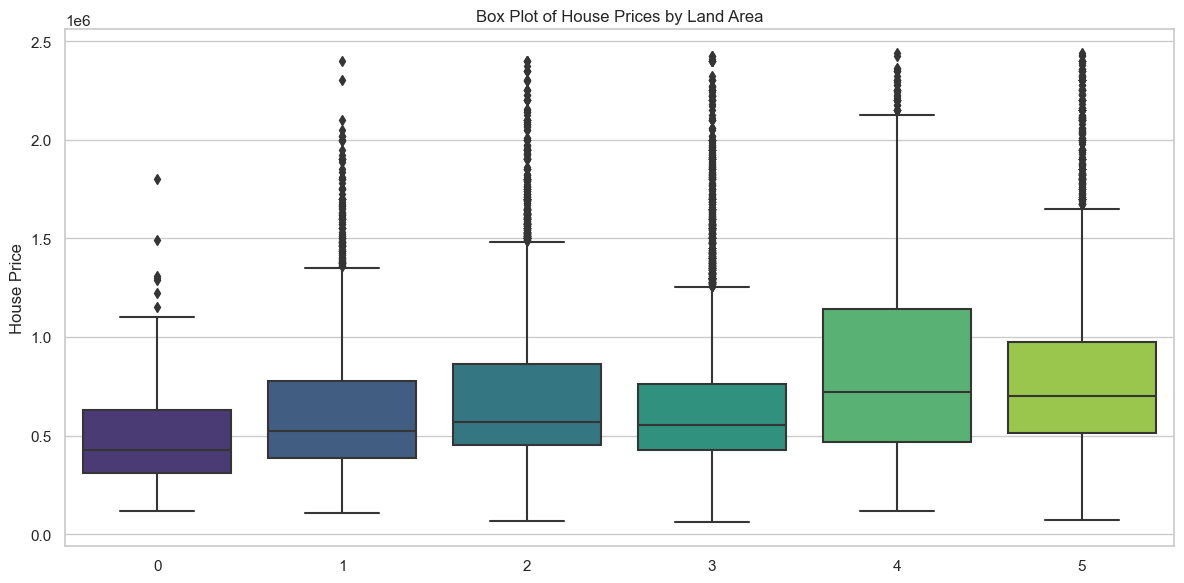

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the land area bins
land_area_bins = [0, 200, 400, 600, 800, 1000, float('inf')]
land_area_labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000+']

# Create a new column 'LAND AREA BIN' based on the land area bins
house_prices_perth_cleaned['LAND AREA BIN'] = pd.cut(house_prices_perth_cleaned['LAND AREA'], bins=land_area_bins, labels=land_area_labels)

# Create a list to store boxplot data for each bin
boxplot_data = []

# Iterate through land area bins and create box plots for each bin
for bin_label in land_area_labels:
    # Filter data for the current bin
    filtered_data = house_prices_perth_cleaned[house_prices_perth_cleaned['LAND AREA BIN'] == bin_label]
    
    # Append the filtered data to the list for boxplot
    boxplot_data.append(filtered_data['PRICE'])
    
# Create a box plot with seaborn
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

sns.boxplot(data=boxplot_data, palette='viridis')

plt.ylabel('House Price')
plt.title('Box Plot of House Prices by Land Area')

plt.tight_layout()
plt.show()


In [140]:
import scipy.stats as stats

# Define the land area bins
land_area_bins = [0, 200, 400, 600, 800, 1000, float('inf')]
land_area_labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000+']

# Create a new column 'LAND AREA BIN' based on the land area bins
house_prices_perth_cleaned['LAND AREA BIN'] = pd.cut(house_prices_perth_cleaned['LAND AREA'], bins=land_area_bins, labels=land_area_labels)

# Filter data for the two land area bins you want to compare (e.g., '0-200' and '200-400')
bin1_data = house_prices_perth_cleaned[house_prices_perth_cleaned['LAND AREA BIN'] == '200-400']
bin2_data = house_prices_perth_cleaned[house_prices_perth_cleaned['LAND AREA BIN'] == '400-600']

# Perform a t-test to compare the means of house prices between the two bins
t_stat, p_value = stats.ttest_ind(bin1_data['PRICE'], bin2_data['PRICE'])

# Print the t-statistic and p-value
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Interpret the results based on the p-value (e.g., if p-value < 0.05, reject the null hypothesis)


T-Statistic: -9.049189274164988
P-Value: 1.782080393732432e-19


In [57]:
# Save the GeoViews plot as a JPEG file
gv.save(map_plot, 'geoviews_map.html', fmt='html')